In [156]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from scipy.optimize import least_squares, curve_fit

%matplotlib inline

workdir = '/mnt/f/My Drive/PARPi binder paper/Figures/Fig2_binding_kd/vel_nir_mef_Kd_UV/vel_nir_mef_Kd_UV_raw_data/'


data = pd.read_csv(workdir + '20230517_vel15uM_titri.csv')
# for name in data.columns[2:]:
#     x = data[name][250:350]  - data[data.columns[1]][250:350]
#     y = sum(x)/len(x)
#     data[name] = data[name] - y
abs_15uM = []
abs_15uM.append(data.iloc[312-250, 2])
for i in range(int(len(data.iloc[312-250, 3:])/3)):
    x = data.iloc[312-250, 3+i*3:3+i*3+3]
    #print(x)
    abs_15uM.append(sum(x)/3)

abs_15uM = []
abs_15uM.append(data.iloc[312-250, 2])
abs_15uM.extend(data.iloc[312-250, 4::3].tolist())

print(data.iloc[312-250, 0])
print(len(abs_15uM))

data = pd.read_csv(workdir + '20230517_vel20uM_titri.csv')
# for name in data.columns[2:]:
#     x = data[name][250:350]  - data[data.columns[1]][250:350]
#     y = sum(x)/len(x)
#     data[name] = data[name] - y
abs_20uM = []
abs_20uM.append(data.iloc[312-250, 2])
for i in range(int(len(data.iloc[312-250, 3:])/3)):
    x = data.iloc[312-250, 3+i*3:3+i*3+3]
    #print(x)
    abs_20uM.append(sum(x)/3)

abs_20uM = []
abs_20uM.append(data.iloc[312-250, 2])
abs_20uM.extend(data.iloc[312-250, 5::3].tolist())
print(data.iloc[312-250, 0])
print(len(abs_20uM))

data = pd.read_csv(workdir + '20230516_vel30uM_titri.csv')
# for name in data.columns[2:]:
#     x = data[name][250:350]  - data[data.columns[1]][250:350]
#     y = sum(x)/len(x)
#     data[name] = data[name] - y
abs_30uM = []
abs_30uM.append(data.iloc[312-250, 2])
for i in range(int(len(data.iloc[312-250, 3:])/3)):
    x = data.iloc[312-250, 3+i*3:3+i*3+3]
    #print(x)
    abs_30uM.append(sum(x)/3)

abs_30uM = []
abs_30uM.append(data.iloc[312-250, 2])
abs_30uM.extend(data.iloc[312-250, 3::3].tolist())
print(data.iloc[312-250, 0])
print(len(abs_30uM))


312
21
312
21
312
19


(-0.05, 1.0)

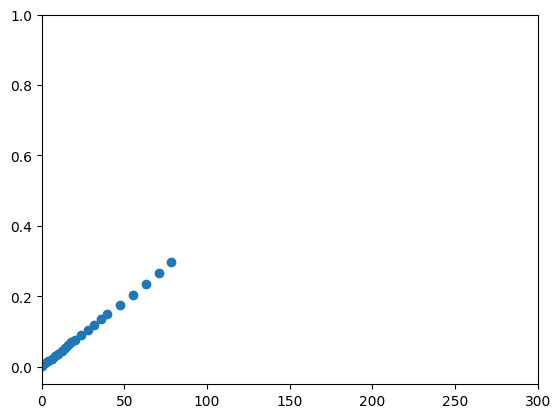

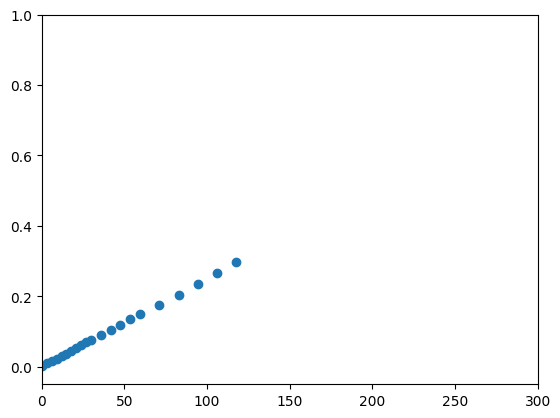

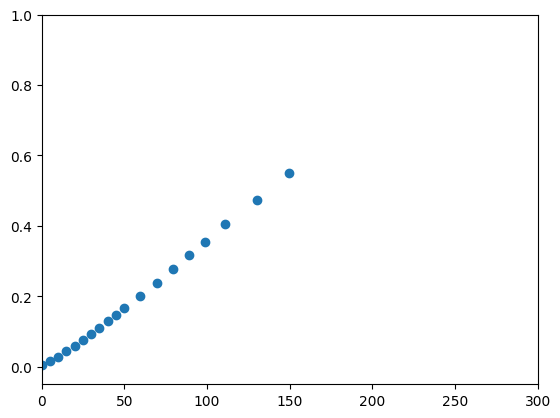

In [157]:
adds_15uM = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 16, 18, 20, 24, 28, 32, 36, 40]
conc_15uM = [4000*x/(2000+x) for x in adds_15uM]
prot_conc_15uM = [2000*15/(2000+x) for x in adds_15uM]

fig,ax = plt.subplots()
ax.scatter(conc_15uM, abs_15uM)
plt.xlim([0, 300])
plt.ylim([-0.05, 1])


adds_20uM = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 16, 18, 20, 24, 28, 32, 36, 40]
conc_20uM = [6000*x/(2000+x) for x in adds_20uM]
prot_conc_20uM = [2000*20/(2000+x) for x in adds_20uM]

fig,ax = plt.subplots()
ax.scatter(conc_20uM, abs_15uM)
plt.xlim([0, 300])
plt.ylim([-0.05, 1])


adds_30uM = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 16, 18, 20, 22.4, 26.4, 30.4]
conc_30uM = [10000*x/(2000+x) for x in adds_30uM]
prot_conc_30uM = [2000*30/(2000+x) for x in adds_30uM]

fig,ax = plt.subplots()
ax.scatter(conc_30uM, abs_30uM)
plt.xlim([0, 300])
plt.ylim([-0.05, 1])


In [168]:
def pl_stoich(Pt, Lt, Kd, n):
    return 1/2*(Kd + Lt + Pt/n - np.sqrt((Kd + Lt + Pt/n)**2 - 4*Lt*Pt/n))

def res_float_nir(x):
    rs = []
    #rs.extend(abs_15uM[i] - abs_15uM[0] - x[3]*conc_15uM[i] - x[0]*pl_stoich(15*2000/(2000+ adds_15uM[i]), conc_15uM[i], x[1], x[2]) for i in range(len(conc_15uM)) )
    rs.extend(abs_20uM[i] - abs_20uM[0] - x[3]*conc_20uM[i] - x[0]*pl_stoich(20*2000/(2000+ adds_20uM[i]), conc_20uM[i], x[1], x[2]) for i in range(len(conc_20uM)) )
    rs.extend(abs_30uM[i] - abs_30uM[0] - x[4]*conc_30uM[i] - x[0]*pl_stoich(30*2000/(2000+ adds_30uM[i]), conc_30uM[i], x[1], x[2]) for i in range(len(conc_30uM)) )
    return rs


In [176]:
res_nir = least_squares(res_float_nir, np.array([.002, 1, 1, .007,.007,.007]), bounds=[(0.0001,.1,.5, .0001,.0001,.0001), (.01,50,3, .1,.1,.1)])
res_nir = least_squares(res_float_nir, np.array([.002, 1, 1, .007,.007,.007]))
res_nir = least_squares(res_float_nir, np.array([.002, 1, 1, .007,.007]))

x = res_nir.x  # fit parameters
x_orig = x

print('Fit of full data from Science paper:')
print(
      'delta Epsilon of Apx @ 305 nm (M^-1 cm^-1)=', x_orig[0],
      '\nKd (uM)=', x_orig[1],
      '\nN(stoichiometry)=', x_orig[2],
      '\nEpsilon of Apx @ 305 nm and c=5 uM (M^-1 cm^-1)=', x_orig[3],
      '\nEpsilon of Apx @ 305 nm and c=10 uM (M^-1 cm^-1)=', x_orig[4],
      #'\nEpsilon of Apx @ 305 nm and c=20uM (M^-1 cm^-1)=', x_orig[5],
      )

#How to compute standard deviation errors.
#https://stackoverflow.com/questions/42388139/how-to-compute-standard-deviation-errors-with-scipy-optimize-least-squares
#print(res_nir.x)

# J = res_nir.jac
# cov = np.linalg.inv(J.T.dot(J))
# var = np.sqrt(np.diagonal(cov))
# print(var)

import scipy.linalg as linalg
U, s, Vh = linalg.svd(res_nir.jac, full_matrices=False)
tol = np.finfo(float).eps*s[0]*max(res_nir.jac.shape)
w = s > tol
cov = (Vh[w].T/s[w]**2) @ Vh[w]  # robust covariance matrix
cov = linalg.inv(res_nir.jac.T @ res_nir.jac)  
perr = np.sqrt(np.diag(cov))  
print(perr)

chi2dof = np.sum(res_nir.fun**2)/(res_nir.fun.size - res_nir.x.size)
cov *= chi2dof
perr = np.sqrt(np.diag(cov)) 
print(perr)

/tmp/ipykernel_28189/1309458684.py:2: RuntimeWarning: invalid value encountered in sqrt
  return 1/2*(Kd + Lt + Pt/n - np.sqrt((Kd + Lt + Pt/n)**2 - 4*Lt*Pt/n))


Fit of full data from Science paper:
delta Epsilon of Apx @ 305 nm (M^-1 cm^-1)= -5.586957119885284 
Kd (uM)= 44.150822438098906 
N(stoichiometry)= 2182.1673619123017 
Epsilon of Apx @ 305 nm and c=5 uM (M^-1 cm^-1)= 0.003983315572068116 
Epsilon of Apx @ 305 nm and c=10 uM (M^-1 cm^-1)= 0.004053821795337806
[5.34925565e+05 5.43672424e+03 2.08862186e+08 2.12935078e-02
 3.05498155e-02]
[1.06180091e+03 1.07916299e+01 4.14581155e+05 4.22665644e-05
 6.06398795e-05]


([<matplotlib.axis.XTick at 0x7fb44a56da90>,
 <a list of 9 Text major ticklabel objects>)

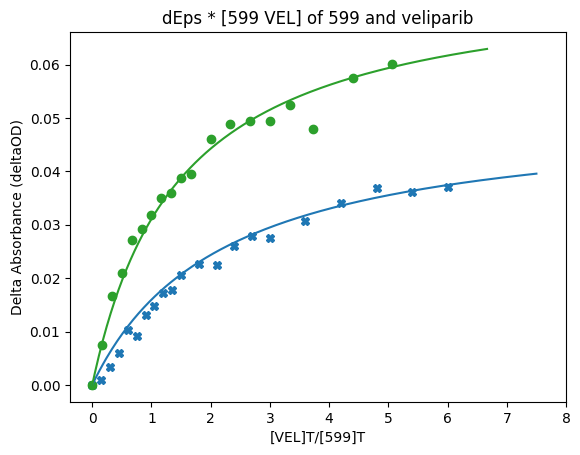

In [177]:
dePL_15 = [-(abs_15uM[i] - abs_15uM[0] - x[3] * conc_15uM[i]) for i in range(len(conc_15uM))]
dePL_20 = [-(abs_20uM[i] - abs_20uM[0] - x[3] * conc_20uM[i]) for i in range(len(conc_20uM))]
dePL_30 = [-(abs_30uM[i] - abs_30uM[0] - x[4] * conc_30uM[i]) for i in range(len(conc_30uM))]

plt.figure()
#plt.plot([4000*add/(15*2000) for add in adds_15uM], dePL_15, 's', label='[ABLER]T = 15 uM', color='tab:orange')
plt.plot([6000*add/(20*2000) for add in adds_20uM], dePL_20, 'X', label='[ABLER]T = 20 uM', color='tab:blue')
plt.plot([10000*add/(30*2000) for add in adds_30uM], dePL_30, 'o', label='[ABLER]T = 30 uM', color='tab:green' )

#fit_dePL_15 = [-x[0] * pl_stoich(15, np.linspace(0,100,200)[i], x[1], x[2]) for i in range(200)]
fit_dePL_20 = [-x[0] * pl_stoich(20, np.linspace(0,150,250)[i], x[1], x[2]) for i in range(250)]
fit_dePL_30 = [-x[0] * pl_stoich(30, np.linspace(0,200,300)[i], x[1], x[2]) for i in range(300)]

#plt.plot([c/15 for c in np.linspace(0,100,200)], fit_dePL_15, color='tab:orange')
plt.plot([c/20 for c in np.linspace(0,150,250)], fit_dePL_20, color='tab:blue')
plt.plot([c/30 for c in np.linspace(0,200,300)], fit_dePL_30, color='tab:green')

plt.xlabel('[VEL]T/[599]T')
plt.ylabel('Delta Absorbance (deltaOD)')
plt.title('dEps * [599 VEL] of 599 and veliparib')
plt.xticks(list(range(9)))